# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>

In [ ]:
# pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 13.2 MB/s eta 0:00:00


In [ ]:
# pip install ufal.pybox2d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 33.7 MB/s eta 0:00:00


In [ ]:
import gymnasium as gym

In [ ]:
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset(seed=42)

is_done = True
while not is_done:
   action = env.action_space.sample()
   observation, reward, terminated, truncated, info = env.step(action)

   if terminated or truncated:
      observation, info = env.reset()

env.close()

In [ ]:
observation

array([ 0.00229702,  1.4181306 ,  0.2326471 ,  0.3204666 , -0.00265488,
       -0.05269805,  0.        ,  0.        ], dtype=float32)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [х] Проверено на семинаре

In [ ]:
env = gym.make("Blackjack-v1")

In [ ]:
def policy(env, state):
  action = env.action_space.sample()
  return action

In [ ]:
games = 10000
wins = 0

for _ in range(games):
    observation = env.reset()
    is_done = False

    while not is_done:
        action = policy(env, observation)
        observation, reward, terminated, truncated, _ = env.step(action)
        is_done = terminated or truncated
    if reward > 0:
        wins +=1
env.close()



In [ ]:
wins

2825

In [ ]:
wins/games

0.2825

<p class="task" id="2"></p>

2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [х] Проверено на семинаре

In [ ]:
# текущая сумму игрока, значение одной открытой карты дилера (1-10, где 1 - туз) и есть ли у игрока пригодный для использования туз (0 или 1).

In [ ]:
env = gym.make("Blackjack-v1")

In [ ]:
def policy(observation):
  player_sum, dealer_card, ace = observation
  if player_sum < 14:
    return 1

  else:
    return 0

In [ ]:
games = 10000
wins = 0

for _ in range(games):
    observation, _ = env.reset()
    is_done = False

    while not is_done:
        action = policy(observation)
        observation, reward, terminated, truncated, _ = env.step(action)
        is_done = terminated or truncated
    if reward > 0:
        wins += 1

env.close()



In [ ]:
wins

4241

In [ ]:
wins/games

0.4241

<p class="task" id="3"></p>

3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Стратегия поведения машины является частью окружения и должна быть реализована внутри него. Сделайте все соответствующие переменные и методы приватными (названия всех переменных начинаются с `__`), подчеркнув, что у пользователя не должно быть к ним доступа извне.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [3]:
from gymnasium  import spaces
import numpy as np

In [51]:
class TicTacToeEnv(gym.Env):
    def __init__(self):
        self.__board = np.zeros((3, 3))
        self.__current_player = 1
        self.__game_over = False


        self.observation_space = spaces.Box(low=-1, high=1, shape=(3, 3), dtype=np.int8)


        self.action_space = spaces.MultiDiscrete([3, 3])

    def is_game_over(self):
        return self.__game_over

    def get_board(self):
        return self.__board.copy()

    def __is_winner(self, player):

      for i in range(3):
          if all(self.__board[i, j] == player for j in range(3)) or \
            all(self.__board[j, i] == player for j in range(3)):
              return True


      if all(self.__board[i, i] == player for i in range(3)) or \
        all(self.__board[i, 2 - i] == player for i in range(3)):
          return True

      return False


    def __is_board_full(self):

        return np.all(self.__board != 0)

    def __is_valid_move(self, action):

        row, col = action
        return self.__board[row, col] == 0

    def step(self, action):
        if self.__game_over:
            print("Игра завершена")
            return self.__board.copy(), 0, True, {}

        if not self.__is_valid_move(action):
            print("Недопустимый ход. Игра завершена.")
            self.__game_over = True
            return self.__board.copy(), 0, True, {}

        row, col = action
        self.__board[row, col] = self.__current_player

        reward = 0
        if self.__is_winner(self.__current_player):
            reward = 1 if self.__current_player == 1 else -1
            self.__game_over = True
            print(f"Игрок {self.__current_player} победил!")
        elif self.__is_board_full():
            self.__game_over = True
            print("Ничья!")
            return self.__board.copy(), 0, True, {} # в задании не прописана награда за ничью, поэтому ставлю 0

        self.__current_player = -1 if self.__current_player == 1 else 1

        return self.__board.copy(), reward, self.__game_over, {}

    def reset(self):
        self.__board = np.zeros((3, 3))
        self.__current_player = 1
        self.__game_over = False
        return self.__board.copy()

    def render(self):
        print(self.__board)

    def close(self):
        pass

In [180]:
env = TicTacToeEnv()
observation = env.reset()

while True:
    env.render()

    my_action = env.action_space.sample()
    observation, reward, done, _ = env.step(my_action)
    if done:
        env.render()
        print(f"Игра окончена. Награда: {reward}")
        break

    if not done:
      machine_action = env.action_space.sample()
      observation, reward, done, _ = env.step(machine_action)
      if done:
          env.render()
          print(f"Игра окончена. Награда: {reward}")
          break

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-1.  0.  0.]
 [ 0.  0.  0.]
 [ 1.  0.  0.]]
[[-1.  0.  0.]
 [ 1. -1.  0.]
 [ 1.  0.  0.]]
[[-1.  0.  0.]
 [ 1. -1. -1.]
 [ 1.  1.  0.]]
Игрок 1 победил!
[[-1.  0.  0.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]]
Игра окончена. Награда: 1


<p class="task" id="4"></p>

4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
# проверяю, можно ли выиграть следующим ходом
# Проверяю, может ли противник выиграть

In [181]:
def strategy(board, player):

    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                board[i][j] = player
                if check_winner(board, player):
                    return (i, j)
                board[i][j] = 0


    opponent = -1 #if player == 1 else 1
    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                board[i][j] = opponent
                if check_winner(board, opponent):
                    return (i, j)
                board[i][j] = 0


    if board[1][1] == 0:
        return (1, 1)

    corners = [(0, 0), (0, 2), (2, 0), (2, 2)]
    for corner in corners:
        if board[corner[0]][corner[1]] == 0:
            return corner


    for i in range(3):
        for j in range(3):
            if board[i][j] == 0:
                return (i, j)

def check_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)):
            return True
        if all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or \
       all(board[i][2-i] == player for i in range(3)):
        return True
    return False

In [187]:
env = TicTacToeEnv()
observation = env.reset()

while True:
    env.render()

    action = strategy(env.get_board(), 1)
    observation, reward, done, _ = env.step(action)
    if done:
        env.render()
        print(f"Игра окончена. Награда: {reward}")
        break

    action = env.action_space.sample()
    observation, reward, done, _ = env.step(action)
    if done:
        env.render()
        print(f"Игра окончена. Награда: {reward}")
        break

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  0.]]
[[-1.  0.  1.]
 [ 0.  1.  0.]
 [-1.  0.  0.]]
[[-1.  0.  1.]
 [ 1.  1.  0.]
 [-1.  0. -1.]]
Игрок 1 победил!
[[-1.  0.  1.]
 [ 1.  1.  1.]
 [-1.  0. -1.]]
Игра окончена. Награда: 1


<p class="task" id="5"></p>

5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

In [10]:
from gymnasium.wrappers import RecordVideo

In [14]:
videos_dir = '/content/out/'
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = RecordVideo(env, videos_dir, episode_trigger=lambda x: x % 5 == 0)

for episode in range(10):
    observation = env.reset()
    done = False

    while not done:
        env.render()
        action = env.action_space.sample()
        observation, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

env.close()

Moviepy - Building video /content/out/rl-video-episode-0.mp4.
Moviepy - Writing video /content/out/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/out/rl-video-episode-0.mp4
Moviepy - Building video /content/out/rl-video-episode-5.mp4.
Moviepy - Writing video /content/out/rl-video-episode-5.mp4



Moviepy - Done !
Moviepy - video ready /content/out/rl-video-episode-5.mp4
Moviepy - Building video /content/out/rl-video-episode-10.mp4.
Moviepy - Writing video /content/out/rl-video-episode-10.mp4



Moviepy - Done !
Moviepy - video ready /content/out/rl-video-episode-10.mp4


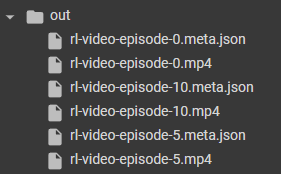

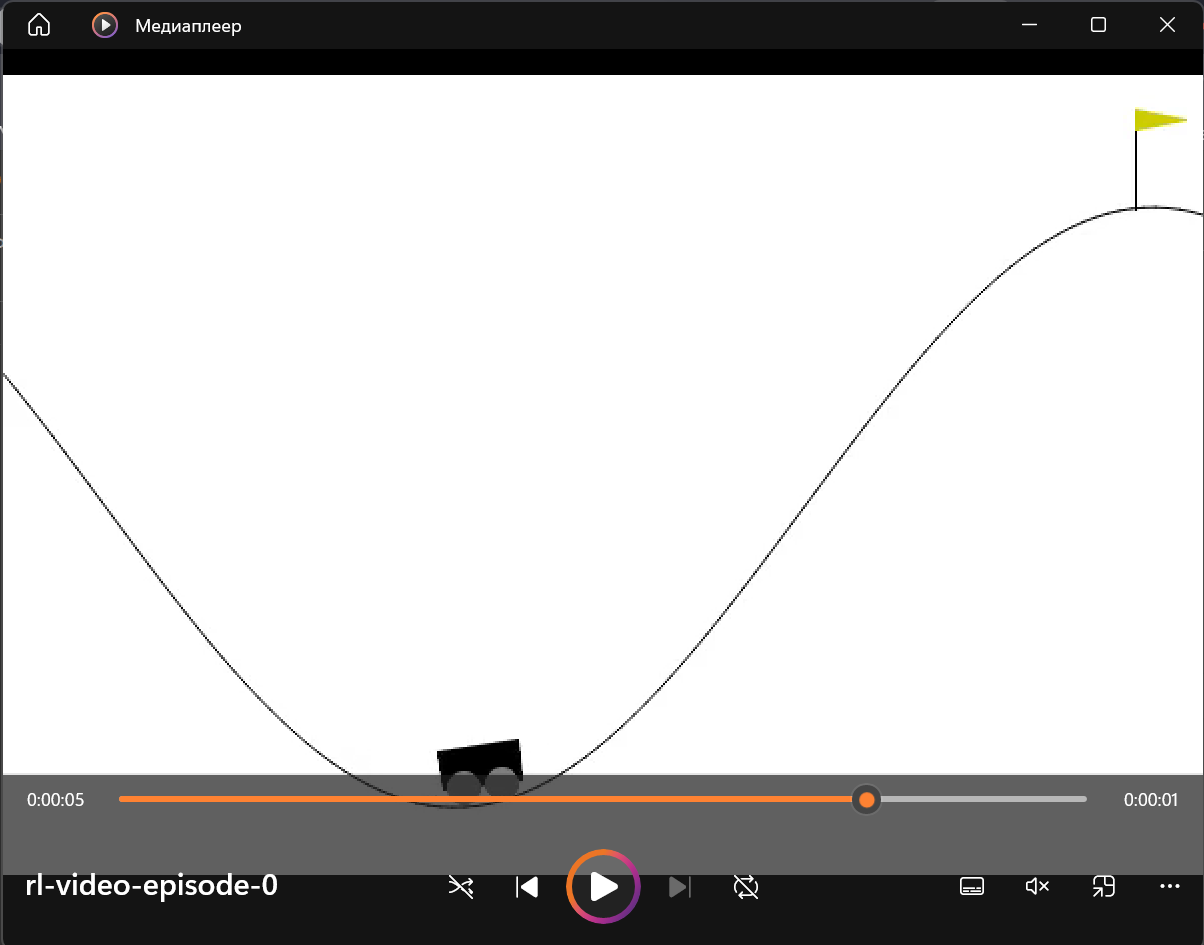

## Обратная связь
- [ ] Хочу получить обратную связь по решению